# one dimensional problem

## find local minima of a function of a single variable using gradient descent method 

we will perfor an experiment on the following polynomial function $ f(x) = x^4 + x^3 - 2x^2 - 2x $ that has multiple local minima. The experiment focuses on:

- changing initial point 
- changing step size 

in order to discover how those parameters affects the result.

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

define the function

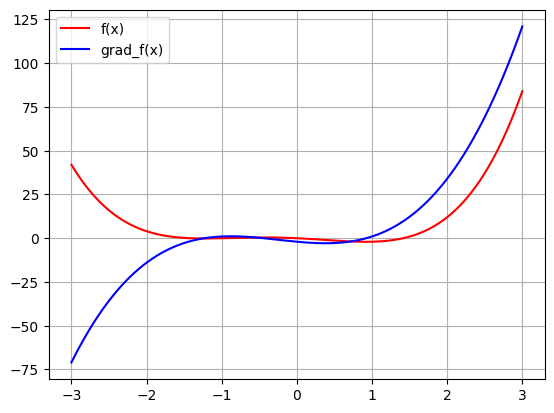

In [2]:
# define f(x)
def f(x):
    return x**4 + x**3 - 2*(x**2) - 2*x

# define the gradient of f(x)
def grad_f(x):
    return 4*x**3 + 3*x**2 - 4*x - 2 

# plot the functions 
n = 200
x = np.linspace(-3,3,n)

plt.plot(x,f(x),'red')
plt.plot(x,grad_f(x),'blue')
plt.legend(["f(x)", "grad_f(x)"])
plt.grid()
plt.show()

In [3]:
'''
implement the GD method on f:R --> R without backtracking
'''
def GD(f,grad_f,x0,kmax,tolf,tolx,alpha = 1e-6):
    
    x_val = [x0]
    f_val = [f(x0)]
    grad_x0 = grad_f(x0)
    norm_grad_x0 = abs(grad_x0)
    grads_val = [grad_x0]
    norm_grads = [norm_grad_x0]
    
    # start iteration
    for k in range(kmax):
        
        # compute the new point  
        x_old = x_val[k]
        x_new = x_old - alpha * grad_f(x_old)
        x_val.append(x_new)
        
        # compute the value of f(x_new)
        f_val.append(f(x_new))
        
        # compute the gradient of f in x_new
        grad_x_new = grad_f(x_new)
        grads_val.append(grad_x_new)
        
        # compute the error
        norm_grads_x_new = abs(grad_x_new)
        norm_grads.append(norm_grads_x_new)
        
        # first condition 
        if norm_grads_x_new < tolf * norm_grad_x0:
            break
        
        # second condition
        if abs(x_new - x_old) < tolx:
            break
        
    return x_val, k, f_val, grads_val, norm_grads

the selected step size is alpha = 0.1
x0 = 0: GD on the function f converges after 11 iterations to the point 0.922224841451033
x0 = -2: GD on the function f converges after 17 iterations to the point -1.232238145066871
x0 = 2: GD on the function f converges after 10 iterations to the point -1.2322413053735493


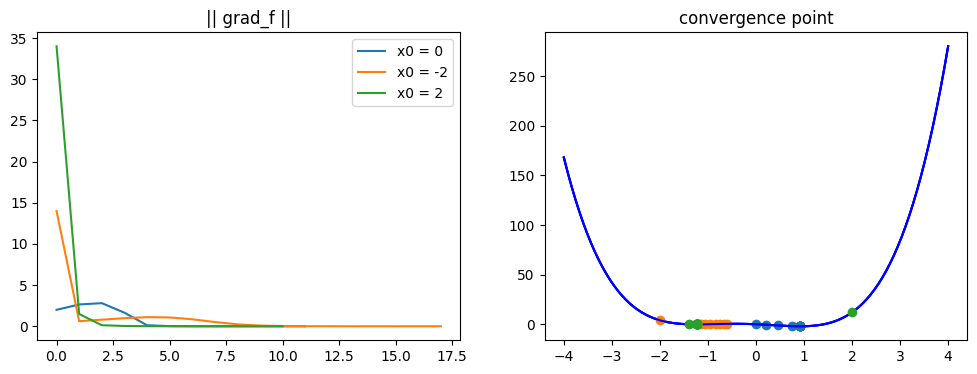

the selected step size is alpha = 0.01
x0 = 0: GD on the function f converges after 113 iterations to the point 0.9222175461936309
x0 = -2: GD on the function f converges after 142 iterations to the point -1.2322523463290935
x0 = 2: GD on the function f converges after 87 iterations to the point 0.9222322138714723


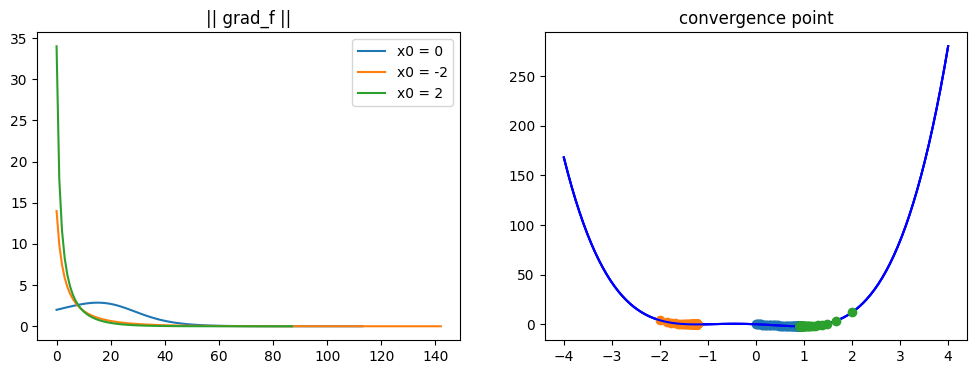

the selected step size is alpha = 0.001
x0 = 0: GD on the function f converges after 969 iterations to the point 0.9221411248012283
x0 = -2: GD on the function f converges after 1000 iterations to the point -1.2325699252588889
x0 = 2: GD on the function f converges after 725 iterations to the point 0.9223087490985102


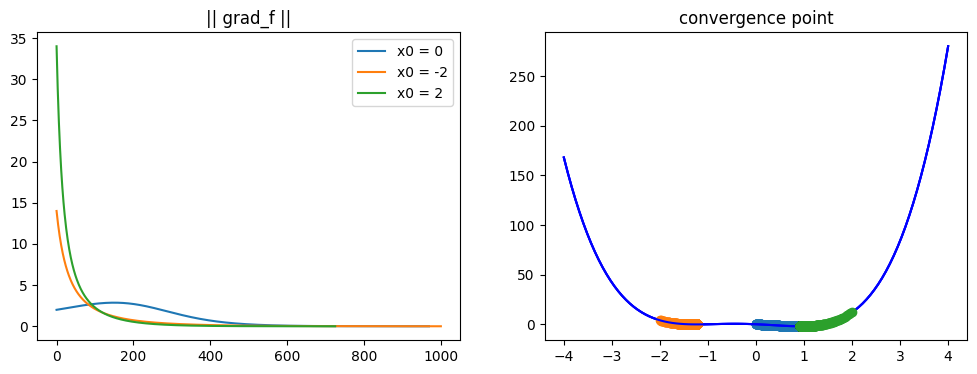

In [7]:
# set the tollerances 
tolf = 1e-6
tolx = 1e-6

# chose the max number of iterations
kmax = 1000

# set step-size range
alphas = (1e-1, 1e-2, 1e-3)
x0s = (0, -2, 2)

for alpha in alphas:
    
    print(f"the selected step size is alpha = {alpha}")
    plt.figure(figsize=(12,4))
    
    for x0 in x0s:

        # test the algorithm
        x_val, k, f_val, grads_val, norm_grads = GD(f,grad_f,x0,kmax,tolf,tolx,alpha)

        # plot the results
        print(f"x0 = {x0}: GD on the function f converges after {k+1} iterations to the point {x_val[-1]}")

        plt.subplot(1, 2, 2)
        plt.plot(np.linspace(-4, 4, 100), f(np.linspace(-4, 4, 100)), 'blue', label=f"x0 = {x0}")
        plt.plot(x_val, f(np.array(x_val)), 'o')
        plt.title('convergence point')
        
        plt.subplot(1, 2, 1)
        plt.plot(norm_grads, label = f"x0 = {x0}")
        plt.title("|| grad_f ||")

    plt.legend()
    plt.show()